<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

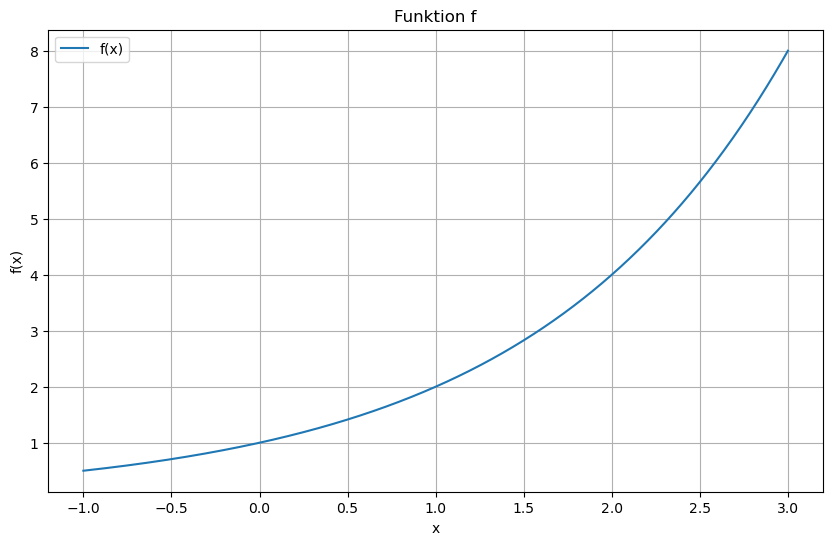

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
from IPython.display import display, Math
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def f_derivative(f, n):
    x_sym = sp.symbols('x')
    f_sym = f(x_sym)
    for k in range(1, n + 2):  # Geht von der ersten bis zur (n+1)-ten Ableitung
        f_nth_derivative = sp.diff(f_sym, x_sym, k)
        f_nth_derivative_func = sp.lambdify(x_sym, f_nth_derivative, 'numpy')
        # Ausgabe der k-ten Ableitung in LaTeX
        display(Math(f"\\frac{{d^{k}}}{{dx^{k}}}f(x) = " + sp.latex(f_nth_derivative)))
        if k == n + 1:  # Nur die (n+1)-te Ableitungsfunktion wird zurückgegeben
            return f_nth_derivative_func

def max_derived_value_in_interval(f, x0, xn, n):
    x_values = np.linspace(x0, xn, 100)  # Erzeugt 100 Punkte im Intervall [x0, xn]
    f_n_plus_1_derivative_func = f_derivative(f, n)
    max_value = np.max(np.abs(f_n_plus_1_derivative_func(x_values)))
    # Ausgabe des maximalen Werts der (n+1)-ten Ableitung
    display(Math(f"\\max\\left|f^{{({n+1})}}(x)\\right|_{{[{x0}, {xn}]}} = {max_value}"))
    return max_value

def produkt_der_differenzen(x, x_i):
    produkt = 1
    for xi in x_i:
        produkt *= (x - xi)
    # Ausgabe des Produkts der Differenzen in LaTeX
    produkt_str = " * ".join([f"(x - {xi})" for xi in x_i])
    display(Math(f"\\text{{Produkt der Differenzen: }} {produkt_str} = {produkt}"))
    return produkt

def fehlerabschaetzung(x, x_i, max_f_n_plus_1):
    n = len(x_i) - 1
    produkt = produkt_der_differenzen(x, x_i)
    fehler = abs(produkt) * max_f_n_plus_1 / math.factorial(n + 1)  # Ersetzen Sie np.math.factorial durch math.factorial
    # Ausgabe des geschätzten Fehlers und der Fakultät in LaTeX
    display(Math(f"\\text{{Geschätzter Fehler bei }} x = {x}: \\quad \\frac{{|{produkt}|}}{{{n+1}!}} \\cdot {max_f_n_plus_1} = {fehler}"))
    return fehler

"""
=======================================================================================================================
INPUT
=======================================================================================================================
"""

# Beispiel-Funktion: f(x) = 2^x
def f(x):
    return 2 ** x

# Beispielwerte
x_i = np.array([-1, 1, 3])  # Interpolationspunkte
x = 2  # Punkt, an dem der Fehler geschätzt wird

"""
=======================================================================================================================
"""

# Berechnung des Maximums der (n+1)-ten Ableitung im Intervall
max_f_n_plus_1 = max_derived_value_in_interval(f, x_i[0], x_i[-1], len(x_i) - 1)

# Plot der Funktion f
x_values = np.linspace(x_i[0], x_i[-1], 1000)
y_values = f(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funktion f')
plt.legend()
plt.grid(True)
plt.show()

# Finden und ausgeben des x-Wertes, der den maximalen Wert von f hat
max_f_index = np.argmax(y_values)
max_f_x = x_values[max_f_index]
display(Math(f"\\text{{Der maximale Wert von f tritt auf bei }} x = {max_f_x}"))

# Fehlerabschätzung
fehler = fehlerabschaetzung(x, x_i, max_f_n_plus_1)

